In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
sns.set()
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import f_regression
import scipy.stats as stat
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from IPython.display import display, HTML
from scipy.stats.mstats import winsorize

pd.options.display.float_format = '{:.5f}'.format

# Explore this dataset using what you have learned in data preprocessing and data visualization
## Invalid data
Some columns are containing mostly 0 (75% quantile = 0):

**waterfront,view,yr_renovated**

(50% quantile = 0)

**sqft_basement**
## Zero values removal
From above table we can see that some columns have ouliers (max is very much bigger that 75% percentile and mean)
price,bedrooms,bathrooms,sqft_living,sqft_lot,view,grade,sqft_above,sqft_basement,sqft_living15	,sqft_lot15

In [197]:
data=pd.read_csv("../input/checkpoints/kc_house_data (2).csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00000,3,1.00000,1180,5650,1.00000,0,0,...,7,1180,0,1955,0,98178,47.51120,-122.25700,1340,5650
1,6414100192,20141209T000000,538000.00000,3,2.25000,2570,7242,2.00000,0,0,...,7,2170,400,1951,1991,98125,47.72100,-122.31900,1690,7639
2,5631500400,20150225T000000,180000.00000,2,1.00000,770,10000,1.00000,0,0,...,6,770,0,1933,0,98028,47.73790,-122.23300,2720,8062
3,2487200875,20141209T000000,604000.00000,4,3.00000,1960,5000,1.00000,0,0,...,7,1050,910,1965,0,98136,47.52080,-122.39300,1360,5000
4,1954400510,20150218T000000,510000.00000,3,2.00000,1680,8080,1.00000,0,0,...,8,1680,0,1987,0,98074,47.61680,-122.04500,1800,7503


In [198]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [199]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [200]:
data.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,21613,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,...,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4580301520.86499,NaN,540088.14177,3.37084,2.11476,2079.89974,15106.96757,1.49431,0.00754,0.23430,...,7.65687,1788.39069,291.50905,1971.00514,84.40226,98077.93980,47.56005,-122.21390,1986.55249,12768.45565
std,2876565571.31206,NaN,367127.19648,0.93006,0.77016,918.44090,41420.51152,0.53999,0.08652,0.76632,...,1.17546,828.09098,442.57504,29.37341,401.67924,53.50503,0.13856,0.14083,685.39130,27304.17963
min,1000102.00000,NaN,75000.00000,0.00000,0.00000,290.00000,520.00000,1.00000,0.00000,0.00000,...,1.00000,290.00000,0.00000,1900.00000,0.00000,98001.00000,47.15590,-122.51900,399.00000,651.00000
25%,2123049194.00000,NaN,321950.00000,3.00000,1.75000,1427.00000,5040.00000,1.00000,0.00000,0.00000,...,7.00000,1190.00000,0.00000,1951.00000,0.00000,98033.00000,47.47100,-122.32800,1490.00000,5100.00000
50%,3904930410.00000,NaN,450000.00000,3.00000,2.25000,1910.00000,7618.00000,1.50000,0.00000,0.00000,...,7.00000,1560.00000,0.00000,1975.00000,0.00000,98065.00000,47.57180,-122.23000,1840.00000,7620.00000
75%,7308900445.00000,NaN,645000.00000,4.00000,2.50000,2550.00000,10688.00000,2.00000,0.00000,0.00000,...,8.00000,2210.00000,560.00000,1997.00000,0.00000,98118.00000,47.67800,-122.12500,2360.00000,10083.00000


In [201]:
bad_cols="waterfront,view,yr_renovated,sqft_basement".split(',')
for col in bad_cols:
    nonzero=data[col][data[col]!=0].count()
    alldata=data[col].count()
    print("Column '{}' has only {:.2f}% of data different from zero".format(col,(nonzero/alldata)*100))

Column 'waterfront' has only 0.75% of data different from zero
Column 'view' has only 9.83% of data different from zero
Column 'yr_renovated' has only 4.23% of data different from zero
Column 'sqft_basement' has only 39.27% of data different from zero


In [202]:
data['waterfront'].unique()

array([0, 1])

**waterfront** seems to be categorical feature 

In [203]:
data['view'].unique()

array([0, 3, 4, 2, 1])

**view** seems to be categorical feature 

In [204]:
categorical=["waterfront","view"]

In [205]:
data['yr_renovated'].unique()

array([   0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, 1978, 2005, 2008,
       2003, 1984, 1954, 2014, 2011, 1974, 1983, 1945, 1990, 1988, 1957,
       1977, 1981, 1995, 2000, 1998, 1970, 1989, 2004, 1986, 2009, 2007,
       1987, 1973, 2006, 1985, 2001, 1980, 1971, 1979, 1997, 1950, 1969,
       1948, 2015, 1968, 2012, 1963, 1951, 1993, 1962, 1996, 1972, 1953,
       1955, 1982, 1956, 1940, 1976, 1946, 1975, 1958, 1964, 1959, 1960,
       1967, 1965, 1934, 1944])

**yr_renovated** did'nt seems to be categorical feature => column must be removed

In [206]:
data['sqft_basement'].unique()

array([   0,  400,  910, 1530,  730, 1700,  300,  970,  760,  720,  700,
        820,  780,  790,  330, 1620,  360,  588, 1510,  410,  990,  600,
        560,  550, 1000, 1600,  500, 1040,  880, 1010,  240,  265,  290,
        800,  540,  380,  710,  840,  770,  480,  570, 1490,  620, 1250,
       1270,  120,  650,  180, 1130,  450, 1640, 1460, 1020, 1030,  750,
        640, 1070,  490, 1310,  630, 2000,  390,  430,  850,  210, 1430,
       1950,  440,  220, 1160,  860,  580, 2060, 1820, 1180,  200, 1150,
       1200,  680,  530, 1450, 1170, 1080,  960, 1100,  280,  870,  460,
       1400, 1320,  660, 1220,  900,  420, 1580, 1380,  475,  690,  270,
        350,  935, 1370,  980, 1470,  160,  950,   50,  740, 1780, 1900,
        340,  470,  370,  140, 1760,  130,  610,  520,  890, 1110,  150,
       1720,  810,  190, 1290,  670, 1800, 1120, 1810,   60, 1050,  940,
        310,  930, 1390, 1830, 1300,  510, 1330, 1590,  920, 1420, 1240,
       1960, 1560, 2020, 1190, 2110, 1280,  250, 23

For the moment we will remove only **yr_renovated**

In [207]:
data=data.drop('yr_renovated', axis=1)

In [208]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000
mean,4580301520.86499,540088.14177,3.37084,2.11476,2079.89974,15106.96757,1.49431,0.00754,0.23430,3.40943,7.65687,1788.39069,291.50905,1971.00514,98077.93980,47.56005,-122.21390,1986.55249,12768.45565
std,2876565571.31206,367127.19648,0.93006,0.77016,918.44090,41420.51152,0.53999,0.08652,0.76632,0.65074,1.17546,828.09098,442.57504,29.37341,53.50503,0.13856,0.14083,685.39130,27304.17963
min,1000102.00000,75000.00000,0.00000,0.00000,290.00000,520.00000,1.00000,0.00000,0.00000,1.00000,1.00000,290.00000,0.00000,1900.00000,98001.00000,47.15590,-122.51900,399.00000,651.00000
25%,2123049194.00000,321950.00000,3.00000,1.75000,1427.00000,5040.00000,1.00000,0.00000,0.00000,3.00000,7.00000,1190.00000,0.00000,1951.00000,98033.00000,47.47100,-122.32800,1490.00000,5100.00000
50%,3904930410.00000,450000.00000,3.00000,2.25000,1910.00000,7618.00000,1.50000,0.00000,0.00000,3.00000,7.00000,1560.00000,0.00000,1975.00000,98065.00000,47.57180,-122.23000,1840.00000,7620.00000
75%,7308900445.00000,645000.00000,4.00000,2.50000,2550.00000,10688.00000,2.00000,0.00000,0.00000,4.00000,8.00000,2210.00000,560.00000,1997.00000,98118.00000,47.67800,-122.12500,2360.00000,10083.00000
max,9900000190.00000,7700000.00000,33.00000,8.00000,13540.00000,1651359.00000,3.50000,1.00000,4.00000,5.00000,13.00000,9410.00000,4820.00000,2015.00000,98199.00000,47.77760,-121.31500,6210.00000,871200.00000


## Dealing with outliers 

In [209]:
def simple_multiplot(data,ncols,plottype):
       
    nrows=int(data.shape[1]/ncols)+1
    cols=data.columns
    fig, axs = plt.subplots(nrows, ncols, constrained_layout=False)
    fig.set_figheight(ncols*20)
    fig.set_figwidth(15)
    
    for f in range(data.shape[1]):
        plt.subplot(nrows,ncols,f+1)
        plottype(data[cols[f]])
        plt.title(cols[f])
        
    plt.tight_layout()
    plt.show() 
    
    

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

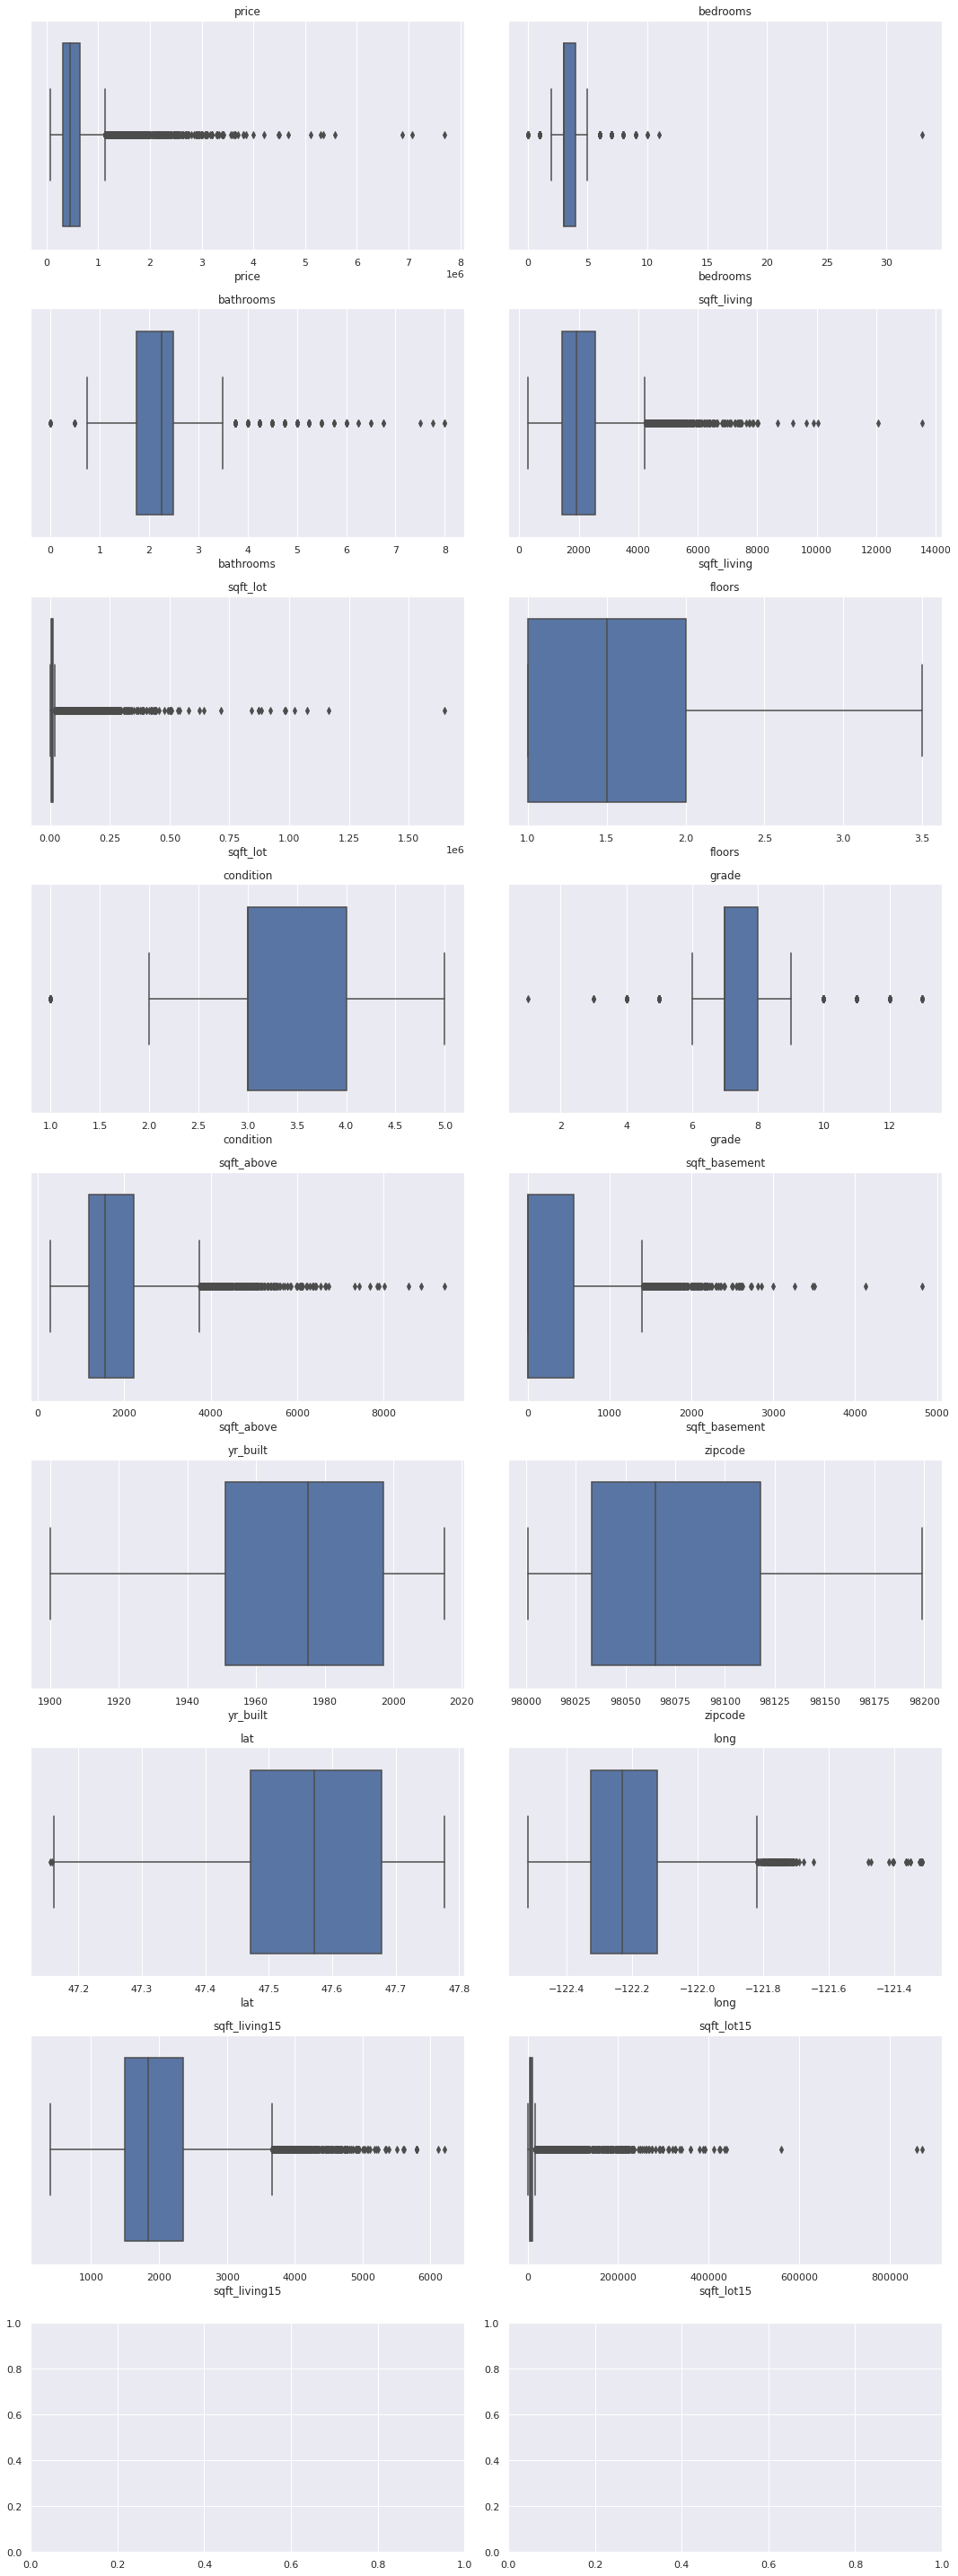

In [210]:
simple_multiplot(data.drop(["id","date"]+categorical,axis=1),2,sns.boxplot)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

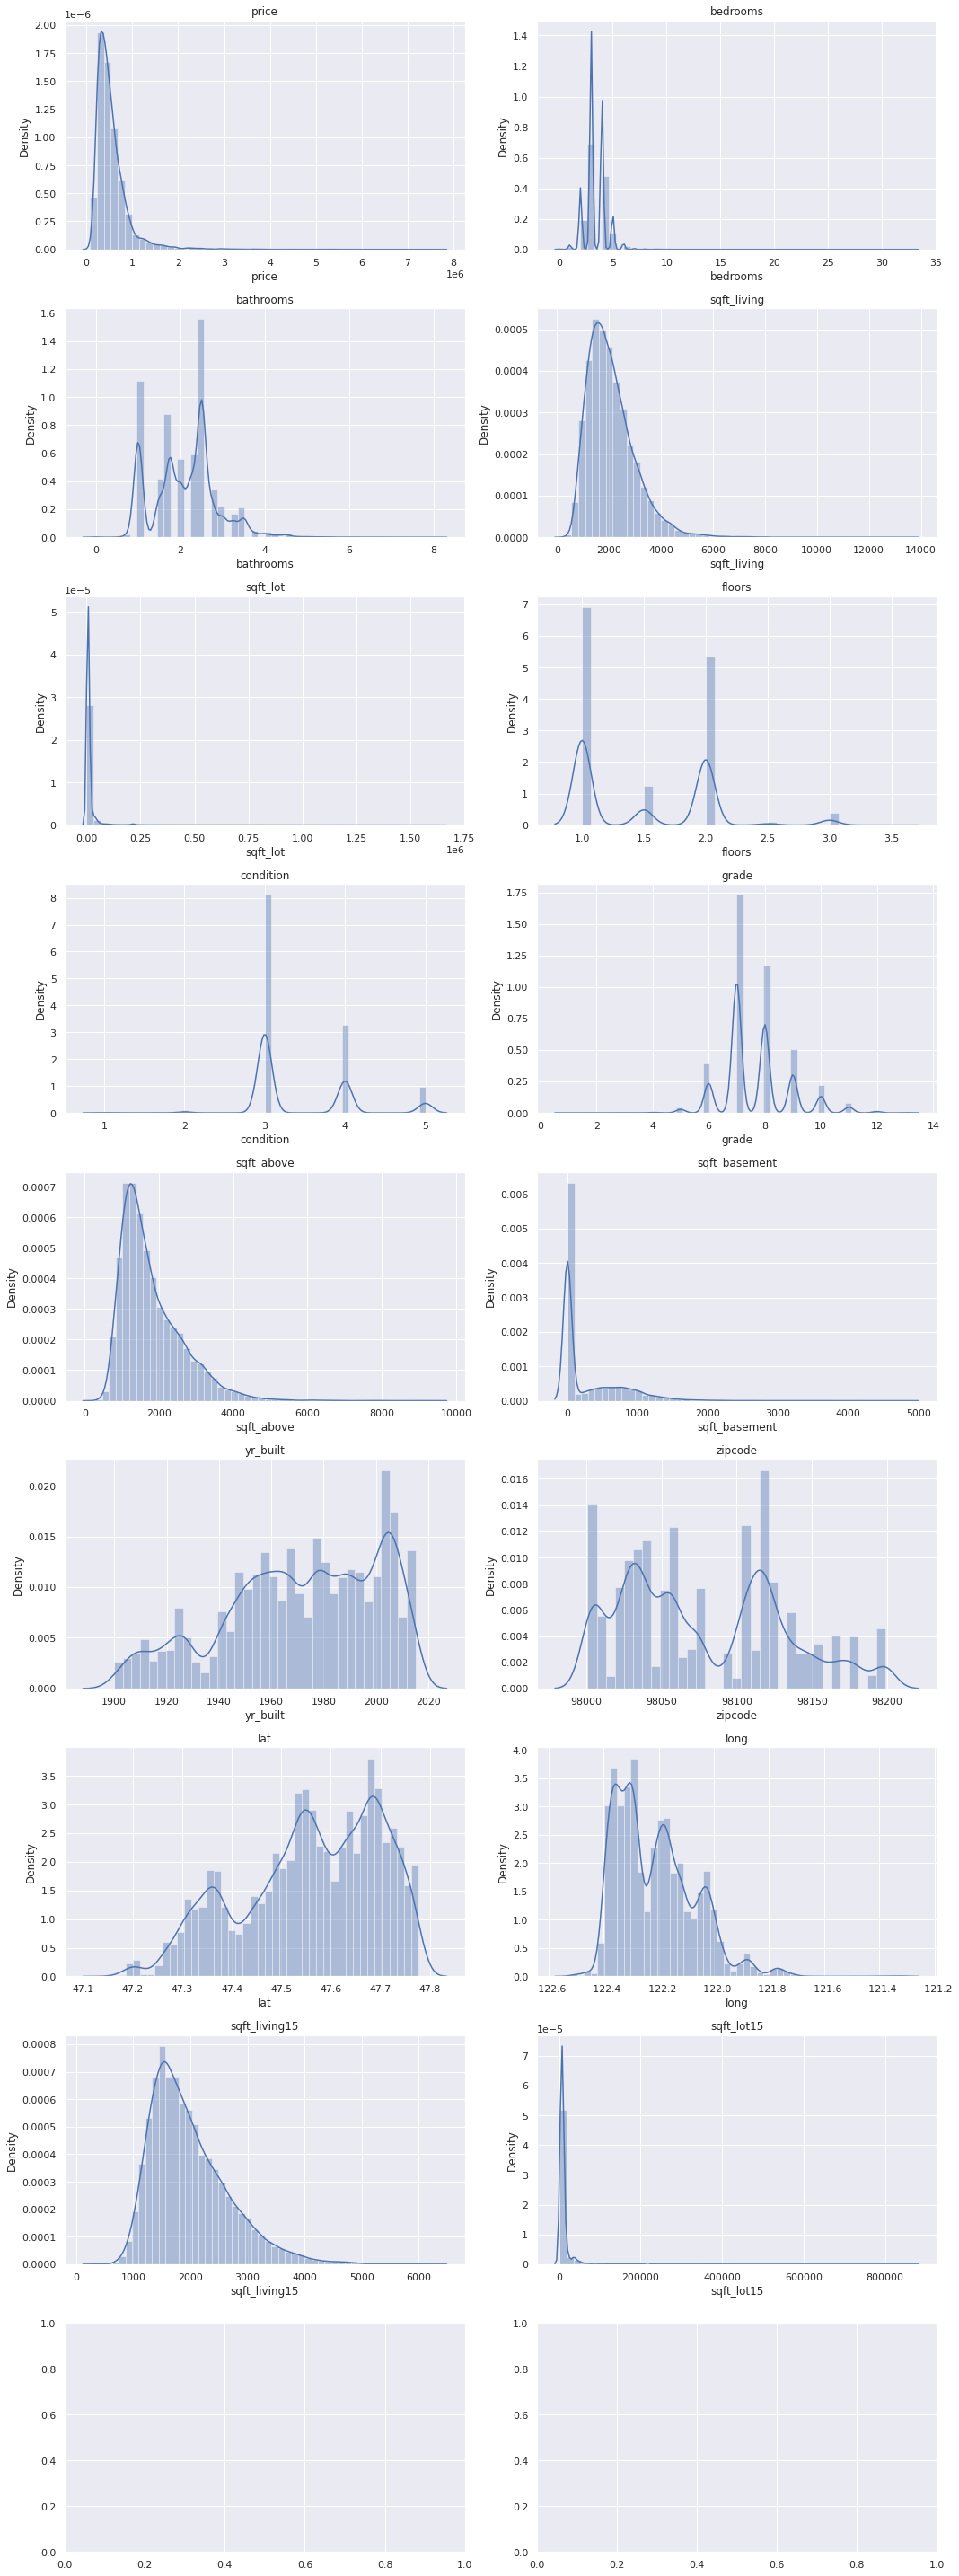

In [211]:
simple_multiplot(data.drop(["id","date"]+categorical,axis=1),2,sns.distplot)

- Because that the predicted column (data[price]) distribution look similar to an exponential distribution we will use a logarithm scale to reduce outliers effects on regression (np.log(data['price']))
- for predictors with outliers we will use winsorize(10%) to aleviate the effect of outliers

In [212]:
# applying log transformation
data['log(price)']=np.log(data['price'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log(price)', ylabel='Density'>

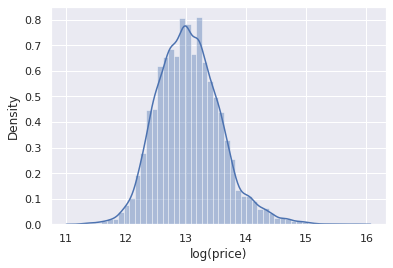

In [213]:
sns.distplot(data['log(price)'])

In [214]:

limit=0.10

data['sqft_lot']=winsorize(data['sqft_lot'],limits=[0,limit])
data['sqft_lot15']=winsorize(data['sqft_lot15'],limits=[0,limit])
data['sqft_living']=winsorize(data['sqft_living'],limits=[0,limit])
data['sqft_above']=winsorize(data['sqft_above'],limits=[0,limit])
data['sqft_basement']=winsorize(data['sqft_basement'],limits=[0,limit])
data['long']=winsorize(data['long'],limits=[0,limit])
data['sqft_living15']=winsorize(data['sqft_living15'],limits=[0,limit])


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

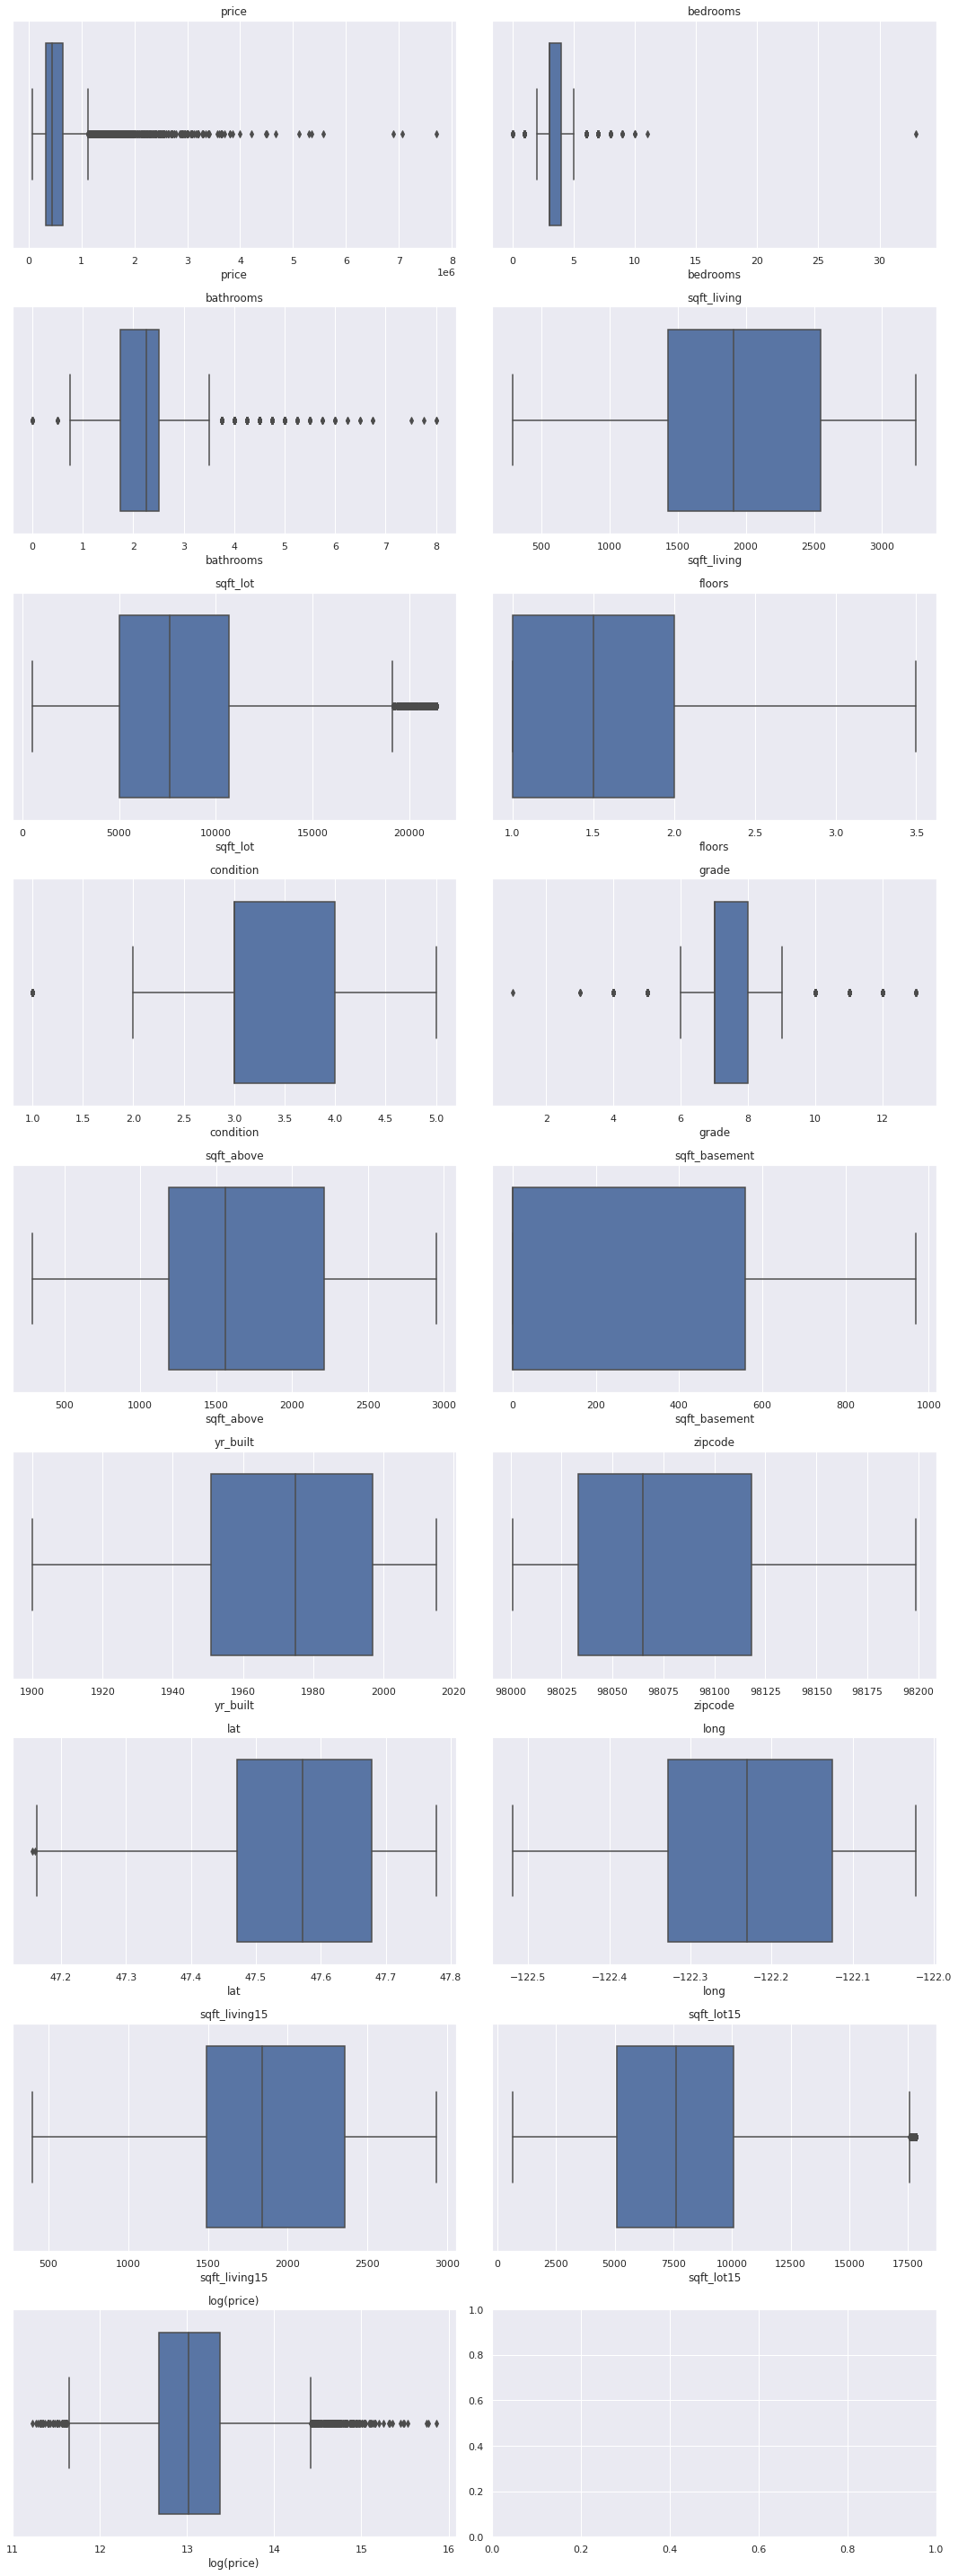

In [215]:
simple_multiplot(data.drop(["id","date"]+categorical,axis=1),2,sns.boxplot)

## Standardize the dataset

In [216]:
scaler = StandardScaler()
data_num=data.drop(["id","date"]+categorical,axis=1)
data[list(data_num.columns)]=scaler.fit_transform(data_num)


In [217]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,log(price)
count,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000
mean,4580301520.86499,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00754,0.23430,-0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000
std,2876565571.31206,1.00002,1.00002,1.00002,1.00002,1.00002,1.00002,0.08652,0.76632,1.00002,1.00002,1.00002,1.00002,1.00002,1.00002,1.00002,1.00002,1.00002,1.00002,1.00002
min,1000102.00000,-1.26686,-3.62440,-2.74592,-2.35629,-1.51547,-0.91543,0.00000,0.00000,-3.70267,-5.66334,-2.14650,-0.71243,-2.41738,-1.43803,-2.91679,-2.43090,-2.71239,-1.73411,-3.46055
25%,2123049194.00000,-0.59419,-0.39874,-0.47362,-0.79262,-0.70216,-0.91543,0.00000,0.00000,-0.62919,-0.55884,-0.79961,-0.71243,-0.68108,-0.83994,-0.64270,-0.86606,-0.78618,-0.72915,-0.69429
50%,3904930410.00000,-0.24539,-0.39874,0.17561,-0.12836,-0.23828,0.01054,0.00000,0.00000,-0.62919,-0.55884,-0.24588,-0.71243,0.13601,-0.24185,0.08478,-0.06316,-0.16824,-0.15991,-0.05851
75%,7308900445.00000,0.28577,0.67649,0.50022,0.75181,0.31413,0.93651,0.00000,0.00000,0.90755,0.29192,0.72688,0.81504,0.88500,0.74874,0.85123,0.79710,0.74985,0.39645,0.62504
max,9900000190.00000,19.50299,31.85793,7.64173,1.71449,2.24143,3.71440,1.00000,4.00000,2.44429,4.54567,1.83433,1.93336,1.49781,2.26265,1.57005,1.64096,1.75621,2.15159,5.33332


# Feature selection

## Simple Feature selection

In [218]:
def plot_correlation_map( df ):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
        )

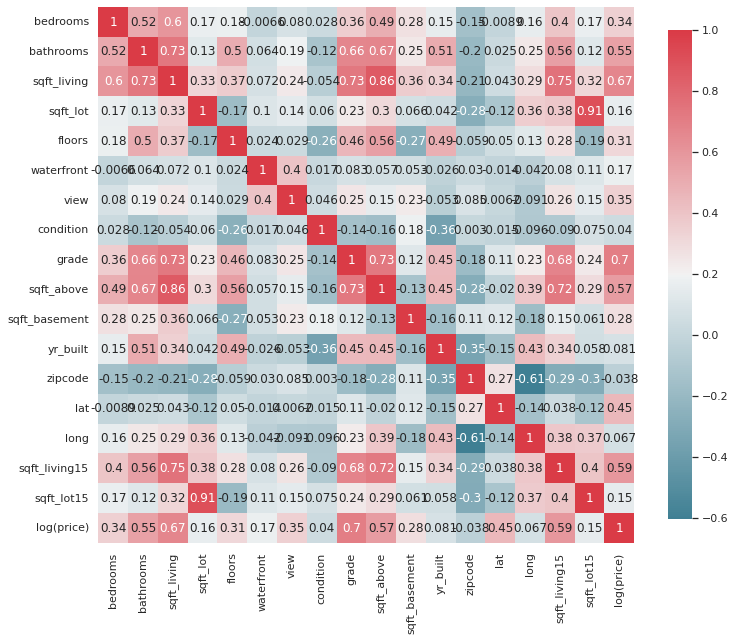

In [219]:
plot_correlation_map(data.drop(["id","date","price"],axis=1))

**Some correlation exist in the data, we must be carefull of collinearity when we do regression**

In [220]:
X= data.drop(["id","date","price","log(price)"],axis=1)
Y=data['log(price)']

select_feature_cov() function select feature according to coorelation factor to the target 

In [221]:
def select_feature_cov(data,target,thredshold):
    corr=data.corr()
    
    feat=list(corr[corr[target]>thredshold].sort_values(by=target,ascending=False).index)
    print("Most importent features realted to target for thredshold > {} (ordred Descending) :{} are {} ".format(thredshold,target,feat[1:]))
    return feat

In [222]:
f=select_feature_cov(data.drop(["id","date","price"],axis=1),'log(price)',0.7)


Most importent features realted to target for thredshold > 0.7 (ordred Descending) :log(price) are ['grade'] 


select_feature_F() calculate relation (F-statistics and pvalues) of features to the target.

## Multi-features selection

**Detecting multicollinearity in selected features**

In order to ensure that selected features are non coollinear we will inspect tha variance inflation factor matrix to be sure.

when VIF=1 : no multicollinearity. 1<VIF<5: perfectly ok .  VIF>10 : input Variable must be removed because of collinearity

In [223]:
VIF=pd.DataFrame()
VIF['feature']=features
VIF['VIF']=[variance_inflation_factor(X[features].values, i) for i in range(len(features))]

VIF

,feature,VIF
0,grade,2.95405
1,sqft_living,29.61380
2,sqft_living15,2.87130
3,sqft_above,27.18501
4,bathrooms,3.03252
5,lat,1.17194
6,view,1.39901
7,bedrooms,1.71946
8,sqft_basement,8.33742
9,waterfront,1.21313


In [224]:
def remove_multicolinear_feats(X,feats,threshold):
    f=feats.copy()
    while len(f)>0:
    
        vif=[variance_inflation_factor(X[f].values, i) for i in range(len(f))]
        
        if (max(vif))<=threshold:
            break
            
        maxvifind=vif.index(max(vif))
        f.pop(maxvifind)
    return f

ncol_features=remove_multicolinear_feats(X,features,10)

print("Non collinear features are : {} and its VIF :{}".format(ncol_features,[variance_inflation_factor(X[ncol_features].values, i) for i in range(len(ncol_features))]))


Non collinear features are : ['grade', 'sqft_living15', 'sqft_above', 'bathrooms', 'lat', 'view', 'bedrooms', 'sqft_basement', 'waterfront', 'sqft_lot15', 'yr_built', 'condition', 'zipcode'] and its VIF :[2.9533567417498796, 2.8049205324153457, 4.654093004192151, 3.028596775398042, 1.1715737405528532, 1.3929918318546333, 1.6967443750260809, 1.8446623672589775, 1.213103392264251, 1.3359512469891524, 1.9512561589155446, 1.2108878384192687, 1.3877629665359597]


A second verification

In [225]:
VIF=pd.DataFrame()
VIF['feature']=ncol_features
VIF['VIF']=[variance_inflation_factor(X[ncol_features].values, i) for i in range(len(ncol_features))]

VIF


,feature,VIF
0,grade,2.95336
1,sqft_living15,2.80492
2,sqft_above,4.65409
3,bathrooms,3.02860
4,lat,1.17157
5,view,1.39299
6,bedrooms,1.69674
7,sqft_basement,1.84466
8,waterfront,1.21310
9,sqft_lot15,1.33595


for Multi-linear regression we will use those non-coolinear features: ['grade', 'sqft_living15', 'sqft_above', 'bathrooms', 'lat', 'view', 'bedrooms', 'sqft_basement', 'waterfront', 'sqft_lot15', 'yr_built', 'condition', 'zipcode']

In [226]:
sm.OLS(Y,X[ncol_features]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             log(price)   R-squared (uncentered):                   0.769
Model:                            OLS   Adj. R-squared (uncentered):              0.768
Method:                 Least Squares   F-statistic:                              5517.
Date:                Thu, 29 Sep 2022   Prob (F-statistic):                        0.00
Time:                        00:01:09   Log-Likelihood:                         -14854.
No. Observations:               21613   AIC:                                  2.973e+04
Df Residuals:                   21600   BIC:                                  2.984e+04
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
grade             0.4022      0.006     71.497      0.000       0.391       0.413
sqft_living15     0.1180      0.005     21.524      0.000       0.107       0.129
sqft_above        0.2483      0.007     35.160      0.000       0.234       0.262
bathrooms         0.1291      0.006     22.667      0.000       0.118       0.140
lat               0.3612      0.004    101.950      0.000       0.354       0.368
view              0.1114      0.005     23.110      0.000       0.102       0.121
bedrooms         -0.0382      0.004     -8.952      0.000      -0.047      -0.030
sqft_basement     0.1203      0.004     27.067      0.000       0.112       0.129
waterfront        0.8427      0.042     20.299      0.000       0.761       0.924
sqft_lot15       -0.0639      0.004    -16.897      0.000      -0.071      -0.057
yr_built         -0.2212      0.005    -48.367      0.000      -0.230      -0.212
condition         0.0695      0.004     19.294      0.000       0.062       0.077
zipcode          -0.0538      0.004    -13.943      0.000      -0.061      -0.046
==============================================================================
Omnibus:                      463.928   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              905.300
Skew:                           0.135   Prob(JB):                    2.61e-197
Kurtosis:                       3.966   Cond. No.                         25.2
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


The preliminary generated model using statsmodel OLS method is acceptable (F-statistic > 1 and Prob (F-statistic)<0.05) and it's features p-values are significants (P>|t| < 0.05)



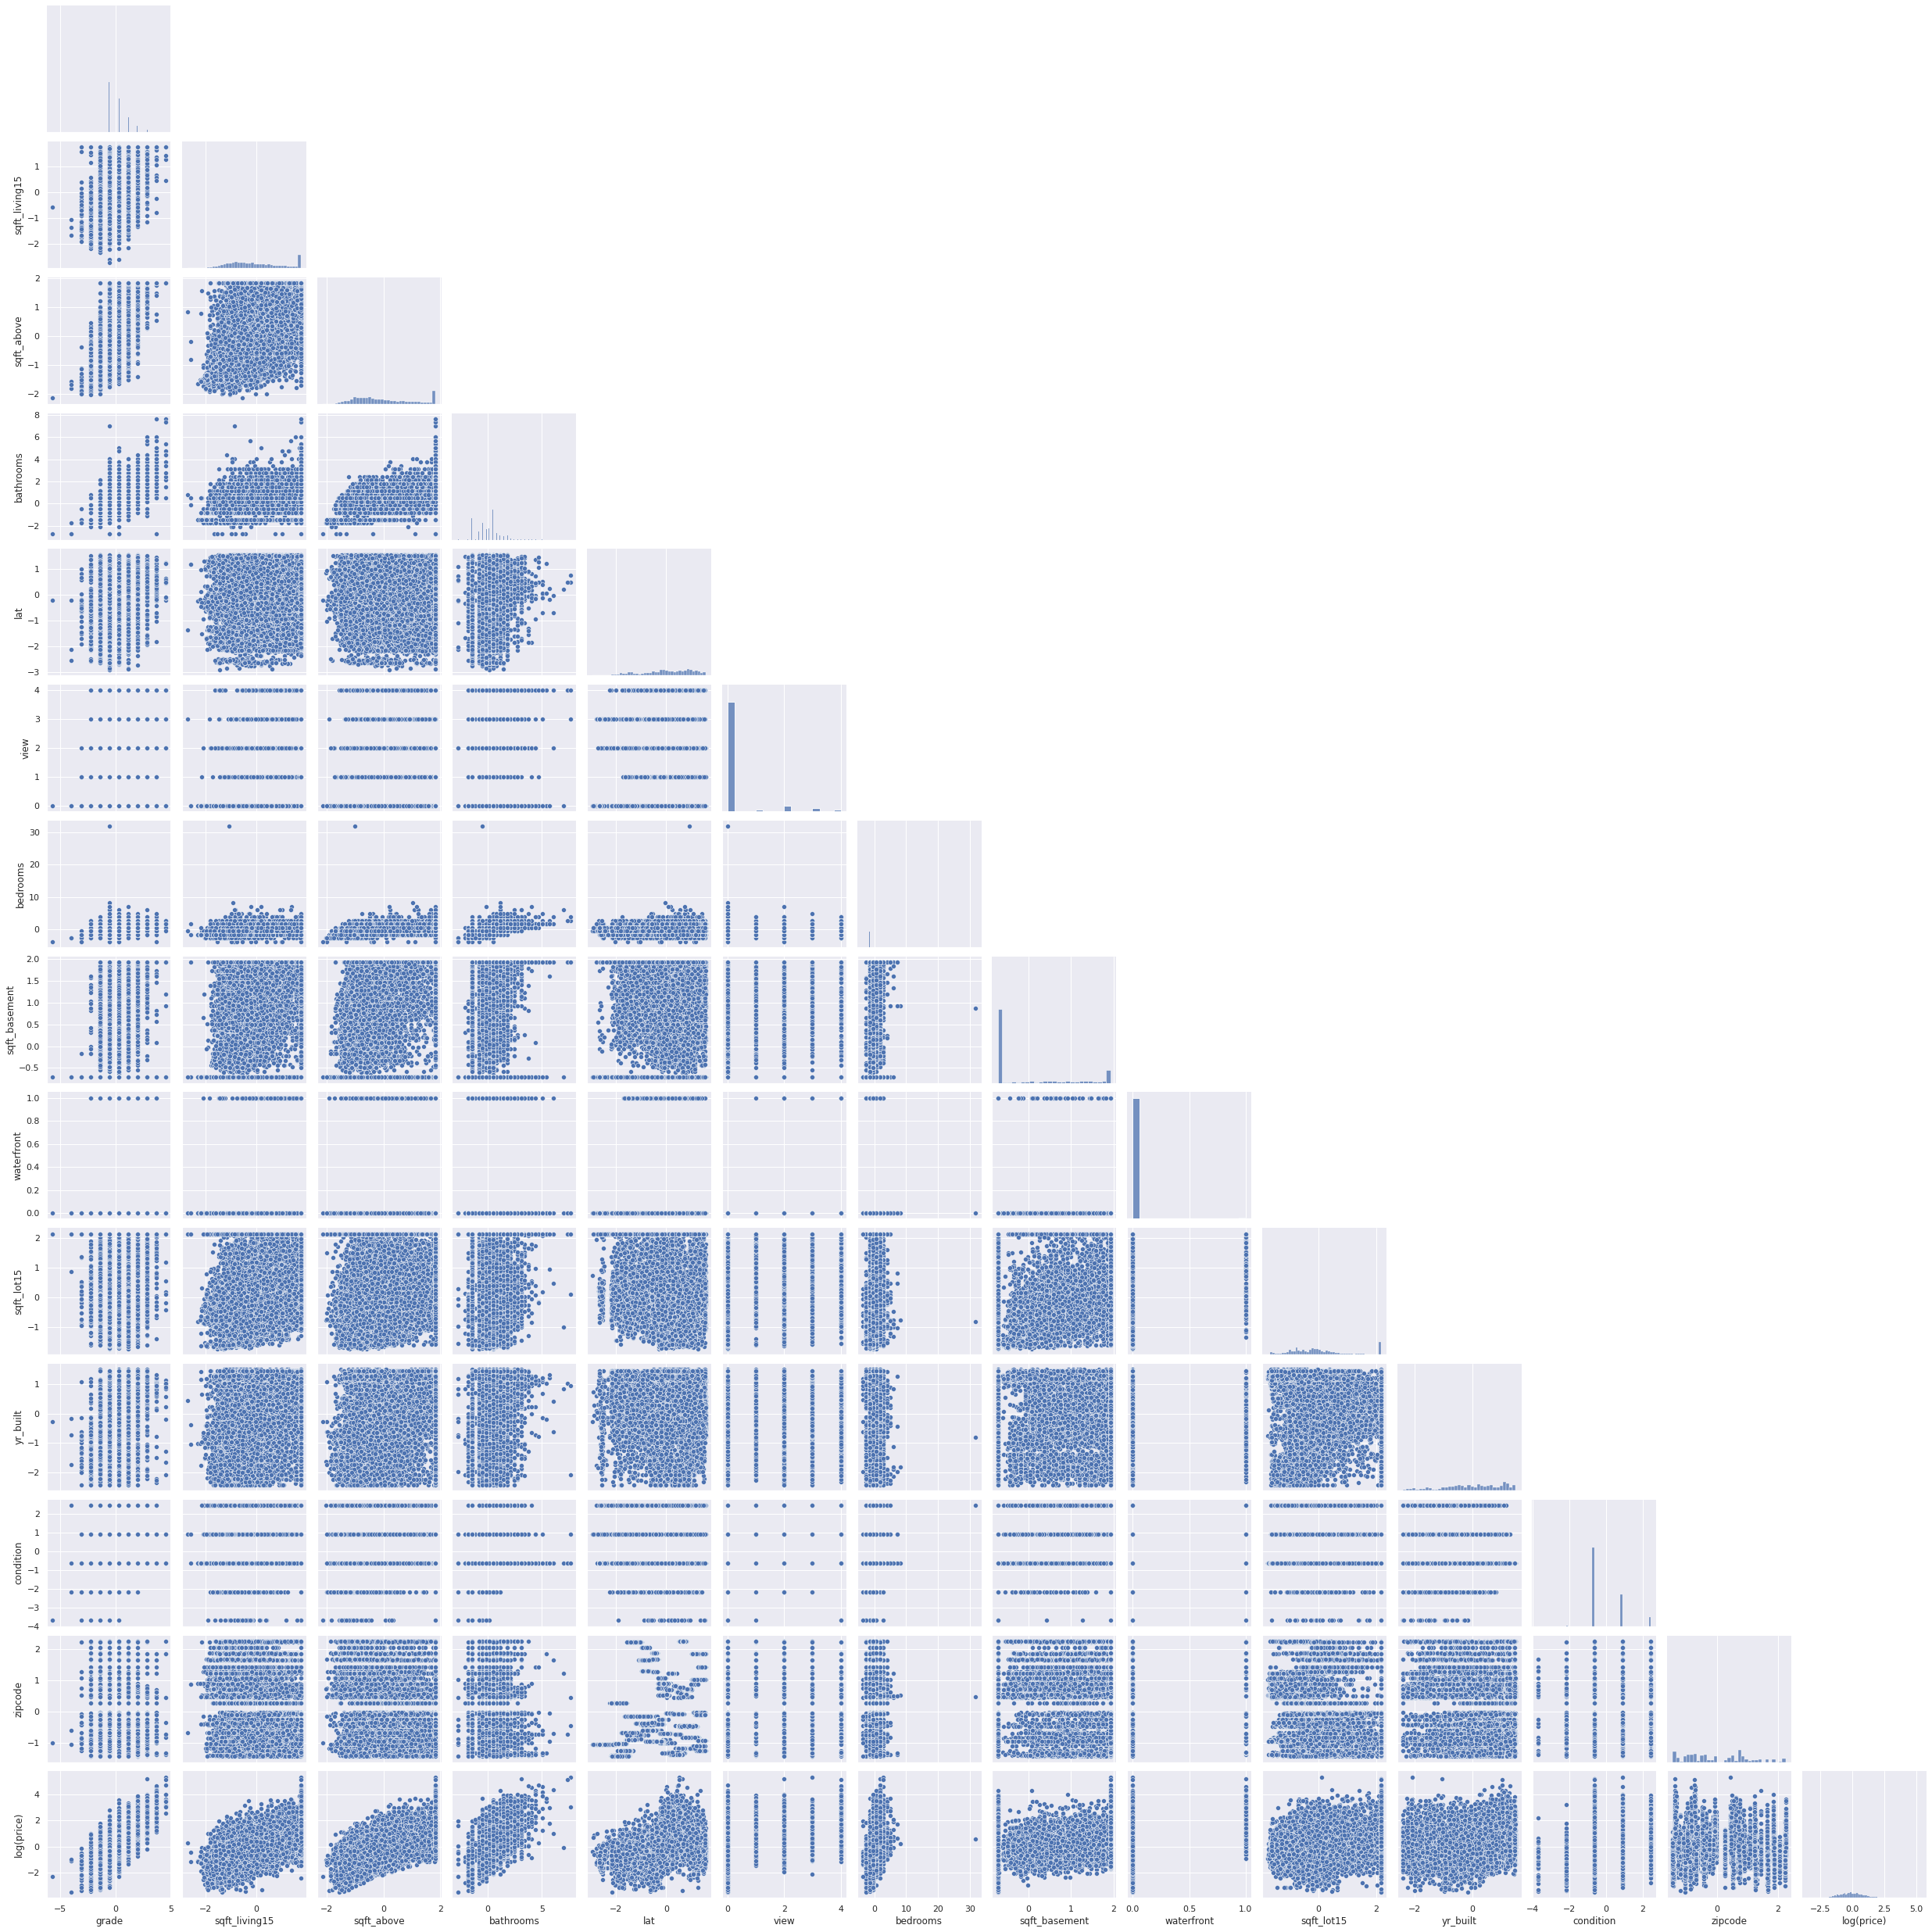

In [227]:
# Pair plot of the most important predictors
all_vars=ncol_features.copy()
all_vars.append('log(price)')
g=sns.pairplot(data[all_vars],corner=True)

# Split your dataset into training and testing datasets.

split_data() function will do the data spliting to training and testing sets

In [228]:
def split_data(X,Y,test_size=0.20,random_state=40):

    cols=list(X.columns)

    Y=Y.values[:,np.newaxis]


    #print("Selected predictors :"," , ".join(cols))
    return train_test_split(X,Y,test_size=test_size,random_state=random_state)

 


# Apply simple Linear regression to your training set

## Linear regression using sklearn library

In [229]:
f=['grade']

MSE 0.5073979681640519
R squared 0.48549596934891237


<AxesSubplot:xlabel='grade', ylabel='price'>

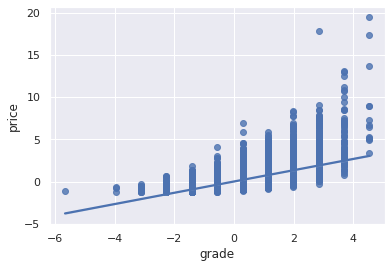

In [230]:
x_train,x_test,y_train,y_test= split_data(X[f],Y)

model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

y_pred = model.predict(x_test)
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", r2_score(y_test,predicted))

sns.regplot(x="grade", y="price", data=data)

**Verification using StatsModels**

In [231]:
results = sm.OLS(y_train,x_train).fit()
res=results.summary()
res

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.497
Model:                            OLS   Adj. R-squared (uncentered):              0.497
Method:                 Least Squares   F-statistic:                          1.711e+04
Date:                Thu, 29 Sep 2022   Prob (F-statistic):                        0.00
Time:                        00:01:47   Log-Likelihood:                         -18615.
No. Observations:               17290   AIC:                                  3.723e+04
Df Residuals:                   17289   BIC:                                  3.724e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
grade          0.7080      0.005    130.808      0.000       0.697       0.719
==============================================================================
Omnibus:                      129.246   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.924
Skew:                           0.199   Prob(JB):                     8.29e-30
Kurtosis:                       3.165   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Plot the linear regression

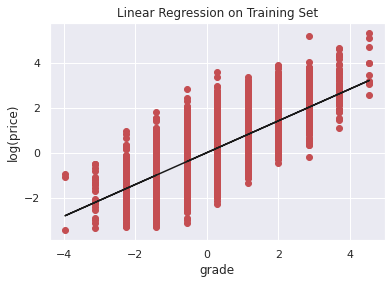

In [232]:
# Train model plotting
plt.scatter(x_train,y_train,color='r')
plt.title('Linear Regression on Training Set')
plt.ylabel('log(price)')
plt.xlabel('grade')
plt.plot(x_train,model.predict(x_train), color='k')
plt.show()

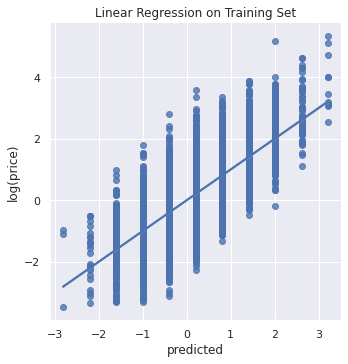

In [233]:
train_result=pd.DataFrame()
train_result['predicted']=model.predict(x_train).flatten()
train_result['log(price)']=y_train.flatten()

train_result['error']=train_result['log(price)']-train_result['predicted']

sns.lmplot(x='predicted',y='log(price)',data=train_result)
plt.title('Linear Regression on Training Set')
plt.show()


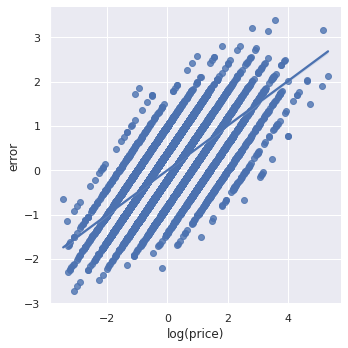

In [234]:
# Trainning error plot
sns.lmplot(x='log(price)',y='error',data=train_result)


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals Distribution')

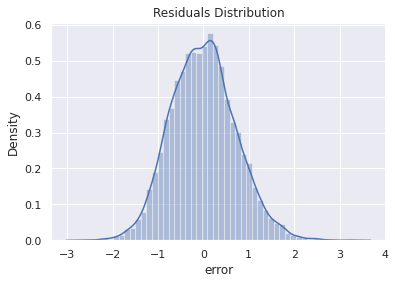

In [235]:
sns.distplot(train_result['error'])
plt.title("Residuals Distribution")

## Measure the performance of linear regression using the testing set

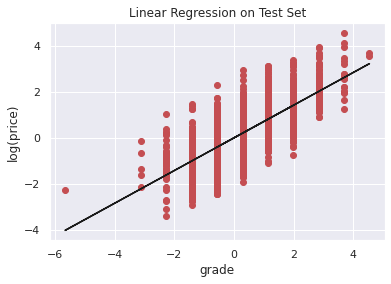

In [236]:
# Test model plotting
plt.scatter(x_test,y_test,color='r')
plt.title('Linear Regression on Test Set')
plt.ylabel('log(price)')
plt.xlabel('grade')
plt.plot(x_test,model.predict(x_test), color='k')
plt.show()

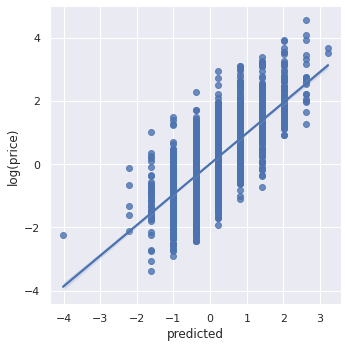

In [237]:
test_result=pd.DataFrame()
test_result['predicted']=model.predict(x_test).flatten()
test_result['log(price)']=y_test.flatten()

test_result['error']=test_result['log(price)']-test_result['predicted']

sns.lmplot(x='predicted',y='log(price)',data=test_result)

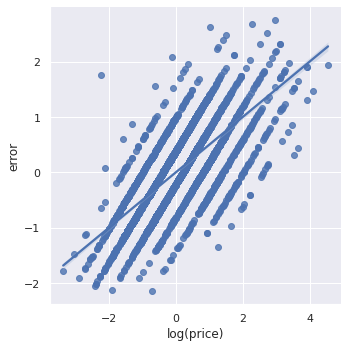

In [238]:
# Testing error plot
sns.lmplot(x='log(price)',y='error',data=test_result)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals Distribution')

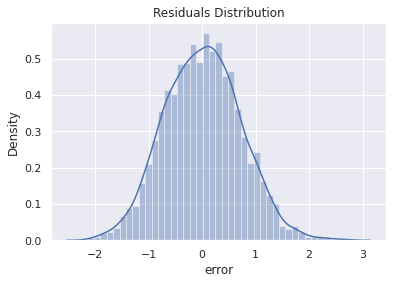

In [239]:
sns.distplot(test_result['error'])
plt.title("Residuals Distribution")

In [240]:
print("MSE Test: ",metrics.mean_squared_error(y_test,model.predict(x_test)))# MSE Test
print("R squared Test: ",metrics.r2_score(y_test,model.predict(x_test)))# R2 Test

MSE Test:  0.5073979681640519
R squared Test:  0.48549596934891237


We can see the Mean Square Error Test is similar to the one from Training set and is low (<1) . 

Also the model keep a stable R2 and MSE in the test and in the training => there is no overfitting

But R2 is low => We must add more features to enhance our model


# Apply Multi-Linear regression to your training set

## Linear regression using sklearn library

In [241]:
x_train,x_test,y_train,y_test= split_data(X[ncol_features],Y)
model,results,pvalues=make_lr(X[ncol_features],Y)
print("The model is log(price)={} x {} + {}".format(model.coef_[0],ncol_features,model.intercept_))
display(HTML(results.to_html()))
display(HTML(pvalues.to_html()))

NameError: name 'make_lr' is not defined

**Verification using StatsModels**

In [ ]:
results = sm.OLS(y_train,x_train).fit()
res=results.summary()
res

## Plot the linear regression

In [ ]:
train_result=pd.DataFrame()
train_result['predicted']=model.predict(x_train).flatten()
train_result['log(price)']=y_train.flatten()

train_result['error']=train_result['log(price)']-train_result['predicted']

sns.lmplot(x='predicted',y='log(price)',data=train_result)



In [ ]:
# Trainning error plot
sns.lmplot(x='log(price)',y='error',data=train_result)


In [ ]:
sns.distplot(train_result['error'])
plt.title("Residuals Distribution")

## Measure the performance of linear regression using the testing set

In [ ]:
test_result=pd.DataFrame()
test_result['predicted']=model.predict(x_test).flatten()
test_result['log(price)']=y_test.flatten()

test_result['error']=test_result['log(price)']-test_result['predicted']

sns.lmplot(x='predicted',y='log(price)',data=test_result)

In [ ]:
# Testing error plot
sns.lmplot(x='log(price)',y='error',data=test_result)

In [ ]:
sns.distplot(test_result['error'])
plt.title("Residuals Distribution")

In [ ]:
print("MSE Test: ",metrics.mean_squared_error(y_test,model.predict(x_test)))# MSE Test
print("R squared Test: ",metrics.r2_score(y_test,model.predict(x_test)))# R2 Test

We can see the Mean Square Error Test is similar to the one from Training set and is low (<1) . 

Also the model keep a stable R2 and MSE in the test and in the training => there is no overfitting

Visually the regression is OK

Multi-linear regression model give better results than simple linear regression. indeed R2 increased and MSE decreased


# Apply Polynomial regression and compare it to the linear and multilinear regression

In [ ]:
X.head()

In [ ]:
poly= PolynomialFeatures(degree=2)
cols=[str(x) for x in range(171)]
X_ = pd.DataFrame(poly.fit_transform(X),columns=cols)

X_

We will repeate the same above steps

- select non colinear most significant features
- split training and testing data
- make the linear regression
- Measure the performance of linear regression using the testing set

## select non colinear most significant features

In [ ]:
features=mixed_feature_select(X_,Y)
ncol_features=remove_multicolinear_feats(X_,features,10)
ncol_features

In [ ]:
print("{} selected features from a total of {} features".format(len(ncol_features), X_.shape[1]))

In [ ]:
VIF=pd.DataFrame()
VIF['feature']=ncol_features
VIF['VIF']=[variance_inflation_factor(X_[ncol_features].values, i) for i in range(len(ncol_features))]

VIF

All 51 features are non collinear (VIF < 10)

## split training and testing data

In [ ]:
x_train,x_test,y_train,y_test= split_data(X_[ncol_features],Y) 

## make the linear regression

MSE 0.23518198055752562
R squared 0.7615243171525072


<AxesSubplot:xlabel='grade', ylabel='price'>

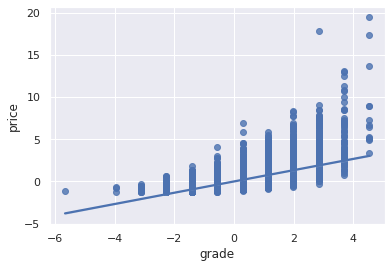

In [242]:
x_train,x_test,y_train,y_test= split_data(X[ncol_features],Y)

from sklearn.linear_model import LinearRegression

model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

y_pred = model.predict(x_test)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", r2_score(y_test,predicted))

sns.regplot(x="grade", y="price", data=data)

We got a better results with R2 increased to 0.76 and MSE decreased to 0.23

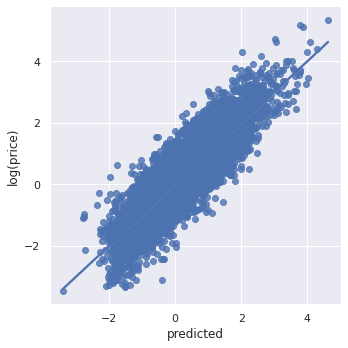

In [243]:
train_result=pd.DataFrame()
train_result['predicted']=model.predict(x_train).flatten()
train_result['log(price)']=y_train.flatten()

train_result['error']=train_result['log(price)']-train_result['predicted']

sns.lmplot(x='predicted',y='log(price)',data=train_result)

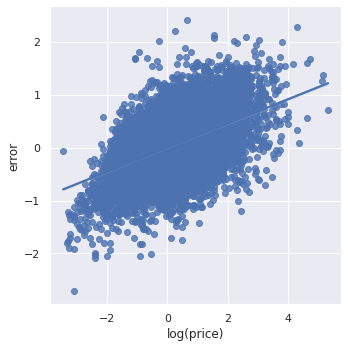

In [244]:
# Trainning error plot
sns.lmplot(x='log(price)',y='error',data=train_result)

## Measure the performance of linear regression using the testing set

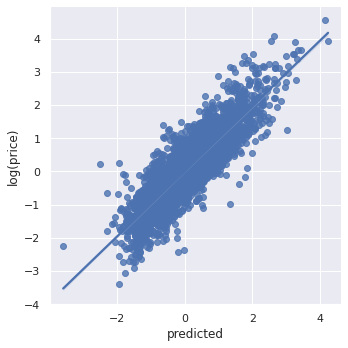

In [245]:
test_result=pd.DataFrame()
test_result['predicted']=model.predict(x_test).flatten()
test_result['log(price)']=y_test.flatten()

test_result['error']=test_result['log(price)']-test_result['predicted']

sns.lmplot(x='predicted',y='log(price)',data=test_result)

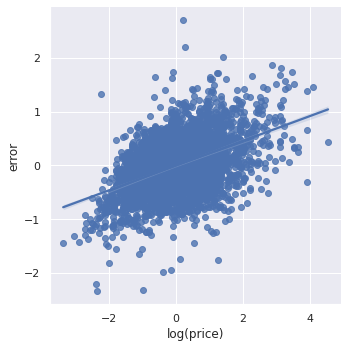

In [246]:
# Testing error plot
sns.lmplot(x='log(price)',y='error',data=test_result)

In [249]:
print("MSE Test: ",metrics.mean_squared_error(y_test,model.predict(x_test)))# MSE Test
print("R squared Test: ",metrics.r2_score(y_test,model.predict(x_test)))# R2 Test

MSE Test:  0.23518198055752562
R squared Test:  0.7615243171525072


We've got also a better result on the testing set for R2 and MSE

The model also is stable between trainning and testing => there is no overfitting
Visually the regression is OK

Polynomial feature transformation gave a better model than multi-linear regression (R2 increased and MSE decreased)